In [27]:
import requests
import json
import numpy as np
from pycocotools import coco, mask
from matplotlib import pyplot as plt
%matplotlib inline

import skimage.measure as measure

In [2]:
server_url = 'http://174.119.70.110:9088'
image_to_infer = r"C:\Users\wuyua\MicroVisionLabelling\Dataset\Batch 7\1526492425725.png"


In [3]:
with open(image_to_infer, 'rb') as f:
    ret = requests.post(server_url, f,headers={'Content-Type': 'application/octet-stream'})

In [4]:
obj = json.loads(ret.content)

In [5]:
obj

{'cls_boxes': [[],
  [[514.901489, 9.502136, 701.911255, 115.136703, 1.0],
   [117.540558, 434.44165, 209.184235, 561.786072, 0.202053],
   [95.16185, 425.980896, 287.423828, 568.769714, 0.129768]],
  [[158.289124, 26.336281, 181.614227, 170.263855, 1.0],
   [481.375305, 237.097672, 586.624329, 319.639648, 1.0],
   [227.636353, 21.238071, 262.543915, 96.021805, 1.0],
   [632.261719, 204.367371, 706.004028, 320.6875, 1.0],
   [261.075836, 258.378326, 293.33316, 296.993439, 0.999904],
   [108.419083, 21.73616, 150.424515, 85.31189, 0.999874],
   [230.276672, 262.191711, 290.854492, 320.803772, 0.943791],
   [659.177734, 9.386875, 786.973755, 52.832863, 1.0],
   [116.261093, 435.249298, 208.59288, 552.034363, 0.999666]]],
 'cls_segms': [[],
  [{'counts': 'Yi]9P1ha01N101N101N5K1O2O001N101O1N1O2O001N101O1O001O00001O1O4L001O0O2O1O1O1O00001N101N2O1O00001O0O2O1O001O000000001O00001O0O2O0O101N10001O1O001O0O2O010O1O001O001O001O1O010O0001O001O000000001O00001O1O0000001O00000000000000000000000000000

In [25]:
msk = mask.decode(obj['cls_segms'][2])

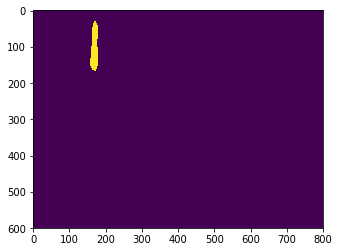

In [26]:
plt.imshow(msk[:,:,0])

In [80]:
shapes = []
main_label = 'crystal form'
labels = ['alpha', 'beta']
tol = 2
cls_segms = obj['cls_segms']
for i in range(1, len(labels) + 1):
    # processing which class
    current_masks = mask.decode(cls_segms[i])
    for j in range(current_masks.shape[-1]):
        # processing which instance
        current_mask = current_masks[:, :, j]
        contours = measure.find_contours(current_mask, 0.1)
        if (len(contours) > 1):
            print("Warning: segment{},{} contains {} parts. They are seperated into multiple objects".format(i, j, len(contours)))
        for contour in contours:
            pts = measure.approximate_polygon(contour, tol)
            shapes.append({"name": "polygon", "all_points_x": pts[:,1], "all_points_y": pts[:,0]})

In [81]:
shapes

[{'all_points_x': array([ 652. ,  597. ,  579. ,  549. ,  539. ,  521. ,  514.1,  514.1,
          533. ,  573. ,  585. ,  615. ,  667. ,  677. ,  688. ,  691.9,
          681.9,  682.9,  686. ,  701.9,  701.9,  695. ,  658. ,  652. ]),
  'all_points_y': array([ 114.9,  114.9,  103.9,   91.9,   80.9,   71.9,   64. ,   33. ,
           23.1,   19.1,   15.1,   23.1,   23.1,   11.1,   13.1,   22. ,
           29. ,   51. ,   56.1,   63. ,   98. ,  102.9,  110.9,  114.9]),
  'name': 'polygon'},
 {'all_points_x': array([ 208. ,  194. ,  188. ,  172. ,  152. ,  146.1,  143.1,  126.1,
          130. ,  145. ,  152.9,  159.9,  192.9,  209.9,  208. ]),
  'all_points_y': array([ 557.9,  552.9,  543.9,  530.9,  524.9,  519. ,  482. ,  445. ,
          437.1,  437.1,  443. ,  459. ,  505. ,  518. ,  557.9]),
  'name': 'polygon'},
 {'all_points_x': array([ 278. ,  250. ,  238.1,  232.1,  230. ,  244. ,  275. ,  285.9,
          287.9,  285. ,  278. ]),
  'all_points_y': array([ 482.9,  460.9,  458.

In [82]:
1:10

SyntaxError: illegal target for annotation (<ipython-input-82-eb35785f49f8>, line 1)